<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/CAPM_Capital_Asset_Pricing_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPM - Capital Asset Pricing Model 

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 837.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 7.3 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm   
import datetime as dt

import urllib.request       # handle online files
import zipfile            
import os                

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams["savefig.dpi"] = 500
np.set_printoptions(precision=5, suppress=True, formatter={"float": lambda x: f"{x:6.3f}"})

%matplotlib inline

<ipython-input-2-4039a680b4e1>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
#help(stats.linregress)

In [3]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Adj Close']
    return mystock

In [4]:
tic=['TSLA', 'SPY']
prices= get_prices(tic, freq_p='1wk', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

prices.rename(columns={"TSLA": "Your_Stock", "SPY":"INDEX"}, inplace=True)

prices.info()
prices.tail(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  TSLA         SPY
Date                              
2011-01-01    1.882667  101.180954
2011-01-08    1.716667  102.899910
2011-01-15    1.536000  102.159821
2011-01-22    1.600667  101.642517
2011-01-29    1.564000  104.372192
...                ...         ...
2022-04-30  288.549988  406.030701
2022-05-07  256.529999  396.534882
2022-05-14  221.300003  384.600952
2022-05-21  253.210007  409.900116
2022-05-28  252.753326  407.600189

[596 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2011-01-01 to 2022-05-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  596 non-null    float64
 1   INDEX       596 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


,Your_Stock,INDEX
Date,,
2022-01-15,314.633331,430.987976
2022-01-22,282.116669,434.894592
2022-01-29,307.773346,441.536835
2022-02-05,286.666656,433.428345
2022-02-12,285.660004,427.297791
2022-02-19,269.956665,430.761627
2022-02-26,279.429993,425.270691
2022-03-05,265.116669,413.363861
2022-03-12,301.796661,437.423523


In [5]:
print(prices.isnull().sum())
prices.dropna(how='any', inplace=True)
print(prices.isnull().sum())
prices.info()
print(prices)

Your_Stock    0
INDEX         0
dtype: int64
Your_Stock    0
INDEX         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2011-01-01 to 2022-05-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  596 non-null    float64
 1   INDEX       596 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB
            Your_Stock       INDEX
Date                              
2011-01-01    1.882667  101.180954
2011-01-08    1.716667  102.899910
2011-01-15    1.536000  102.159821
2011-01-22    1.600667  101.642517
2011-01-29    1.564000  104.372192
...                ...         ...
2022-04-30  288.549988  406.030701
2022-05-07  256.529999  396.534882
2022-05-14  221.300003  384.600952
2022-05-21  253.210007  409.900116
2022-05-28  252.753326  407.600189

[596 rows x 2 columns]


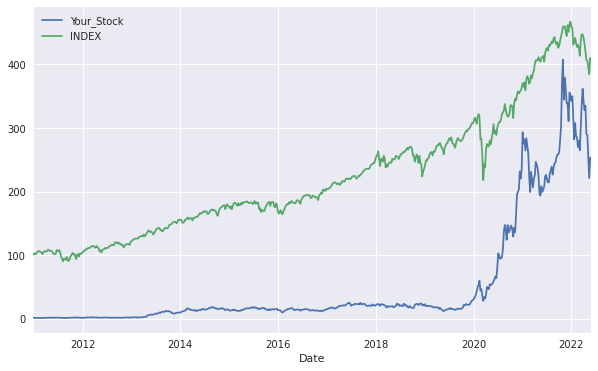

In [6]:
prices.plot(figsize=(10,6))
plt.legend()

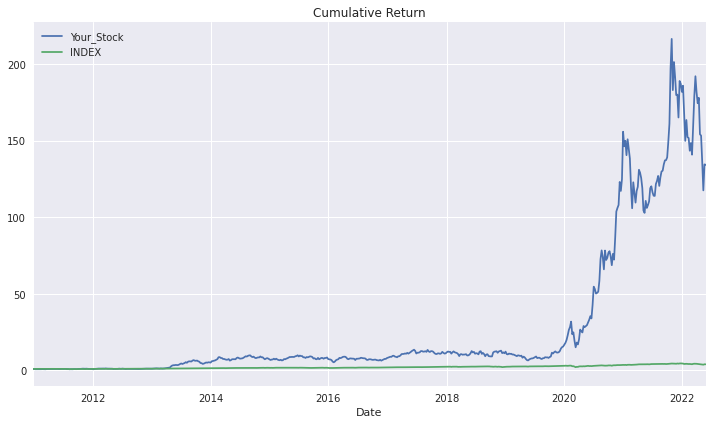

In [7]:
(prices / prices.iloc[0] * 1).plot(figsize=(10, 6), subplots=False)  #cumulative returns
plt.title('Cumulative Return')
plt.tight_layout()

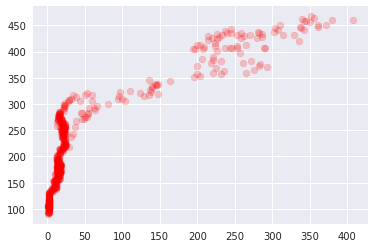

In [8]:
prices.pct_change(1).dropna()
plt.scatter(prices['Your_Stock'], prices['INDEX'], color = 'red', alpha=0.2)

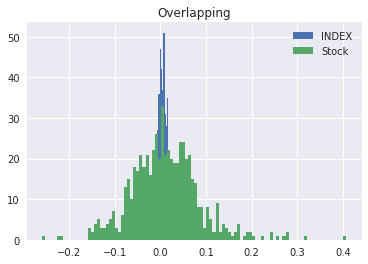

In [9]:
returns = prices.pct_change(1).dropna()

plt.hist(returns['INDEX'], label='INDEX', bins=100) 
plt.hist(returns['Your_Stock'], label='Stock', bins=100)
  
plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

In [10]:
returns

,Your_Stock,INDEX
Date,,
2011-01-08,-0.088173,0.016989
2011-01-15,-0.105243,-0.007192
2011-01-22,0.042101,-0.005064
2011-01-29,-0.022907,0.026856
2011-02-05,-0.008951,0.014945
...,...,...
2022-04-30,-0.005868,-0.001602
2022-05-07,-0.110969,-0.023387
2022-05-14,-0.137333,-0.030096


#using scipy

In [11]:
beta,alpha,r_value,p_value,std_err = stats.linregress(returns['INDEX'],returns["Your_Stock"])

In [12]:
print(beta.round(4))
print(alpha.round(4))
print(r_value.round(2))
print(p_value.round(4))

1.5397
0.0071
0.45
0.0


#using statsmodels

In [13]:
formula = 'Your_Stock ~ INDEX'
results = smf.ols(formula, returns).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Your_Stock   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     152.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.18e-31
Time:                        23:16:11   Log-Likelihood:                 756.72
No. Observations:                 595   AIC:                            -1509.
Df Residuals:                     593   BIC:                            -1501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0071      0.003      2.527      0.0

#using scikit-learn
You need to take a look at the shape of the data you are feeding into .fit().

Here x.shape = (10,) but we need it to be (10, 1), see sklearn. Same goes for y. So we reshape:

In [14]:
X = returns.loc[:, ['INDEX']].values

In [15]:
y = returns.loc[:, ['Your_Stock']].values

In [16]:
X.shape

(595, 1)

In [17]:
type(X)

numpy.ndarray

In [18]:
X.dtype

dtype('float64')

In [19]:
y.shape

(595, 1)

In [20]:
reg = LinearRegression(fit_intercept=True).fit(X,y)

In [21]:
reg.predict(X[0].reshape(-1,1))

array([[ 0.033]])

In [22]:
reg.predict(X[0:10])

array([[ 0.033],
       [-0.004],
       [-0.001],
       [ 0.048],
       [ 0.030],
       [ 0.024],
       [-0.018],
       [ 0.009],
       [-0.012],
       [-0.029]])

In [23]:
score = reg.score(X, y)
print(score)

0.2048562366630433


In [24]:
reg.coef_

array([[ 1.540]])

In [25]:
reg.intercept_

array([ 0.007])

In [26]:
m = reg.coef_[0,0]
b = reg.intercept_[0]

In [27]:
m

1.5397127262862014

In [28]:
b

0.007084853239936928

In [29]:
# following slope intercept form 
print("formula: y = {:.4f}X + {:.4f}".format(m, b) )

formula: y = 1.5397X + 0.0071


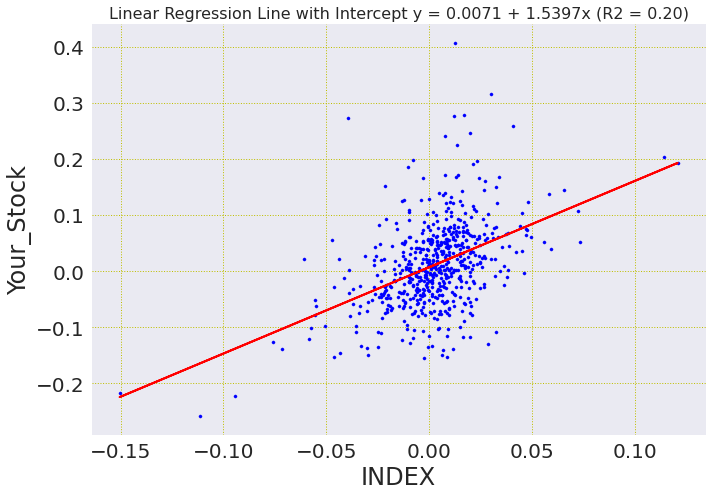

In [30]:
from numpy.ma.core import flatten_structured_array
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='blue', s=10);
ax.plot(X, reg.predict(X), color='red',linewidth=2);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'y')
ax.tick_params(labelsize = 20)
ax.set_xlabel('INDEX', fontsize = 24)
ax.set_ylabel('Your_Stock', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.4f} + {:.4f}x (R2 = {:.2f})".format(b, m, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)